# Introduction to Python Project : FoodHub Data Analysis

# Problem Statement
FoodHub is a food delivery app in New York, where new restaurants are opening every day. Many students and professionals depend on food delivery because of their busy lives. FoodHub wants to study customer orders and restaurant performance to improve service and meet demand better.

#Objective

* Understand how customers order food.
* Identify popular restaurants and cuisines.
* Study how delivery time and preparation time affect customer experience.
* Analyze customer ratings to see their connection with food quality and service.
* Gather insights to help FoodHub improve business strategies and customer satisfaction.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cusine ordered by the customer
* cost_of_the_order: Cost od the order
* day_of_the_week: Weekday or weekend order(the weekday is from Monday to Friday and the weekend is Saturday and Sunday).
* rating: Rating given by the customer out of 5 (or "Not given").
* food_preparation_time: Time taken to prepare food (in minutes).
* delivery_time: Time taken for delivery (in minutes).

### Let us start by importing the required libraries

In [1]:
# Import required libraries for data handling
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure all columns in the DataFrame are displayed
pd.set_option('display.max_columns', None)

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

print('Libraries Imported')

Libraries Imported


### Understanding the structure of the data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading the CSV file from Google Drive
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/foodhub_order.csv')

In [4]:
# viewing the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [5]:
# Get the number of rows and columns

num_rows, num_columns = df.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 1898
Number of columns: 9


#### Observations:
####dataset contains 1,898 rows and 9 columns.

* 1,898 orders have been recorded, each with details like restaurant name, cuisine type, order cost, rating, preparation time, and delivery time



### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [6]:
print("Dataset details:\n") # Get the datatypes of each column
print(df.info())

Dataset details:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB
None


#### Observations:

* Oorder_id and customer_id are numbers (whole numbers).

* Restaurant_name and cuisine_type are words (names of restaurants and types of food).

* Cost_of_the_order is a decimal number (shows the price of the food).

* Day_of_the_week and rating are words (show the day of the order and customer rating, sometimes "Not given").

* Food_preparation_time and delivery_time are numbers (count the minutes taken to cook and deliver the food).

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [7]:
missing_values = df.isnull().sum() # Check for missing values

print("Missing Values in Each Column:\n")
print(missing_values)

Missing Values in Each Column:

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations:

* Some ratings are missing, shown as "Not given." These should be handled properly.

* Other columns seem complete, with no missing values.

* We can replace missing ratings with the average rating, the most common rating, or mark them as "Unknown."

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [8]:
# finding the statistical summary for food preparation time
prep_time_summary = df["food_preparation_time"].describe()

print("Food Preparation Time Summary:")
print(prep_time_summary)

# Extract minimum, average and maximum values
min_prep_time = prep_time_summary["min"]
avg_prep_time = prep_time_summary["mean"]
max_prep_time = prep_time_summary["max"]

print(f"\nMinimum preparation time: {min_prep_time} minutes")
print(f"Average preparation time: {avg_prep_time:.2f} minutes")
print(f"Maximum preparation time: {max_prep_time} minutes")


Food Preparation Time Summary:
count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

Minimum preparation time: 20.0 minutes
Average preparation time: 27.37 minutes
Maximum preparation time: 35.0 minutes


#### Observations:

* The minimum food preparation time is 20 minutes.

* The average preparation time is 27.36 minutes.

* The maximum preparation time is 35 minutes.

* This means restaurants take anywhere from 20 to 35 minutes to prepare food, with most orders taking around 27 minutes.



### **Question 5:** How many orders are not rated? [1 mark]

In [9]:
unrated_orders = (df["rating"] == "Not given").sum()  # Count the number of "Not given" ratings

print(f"Number of orders not rated: {unrated_orders}")

Number of orders not rated: 736


#### Observations:

* 736 customers did not provide feedback on their orders.

* If needed, we can fill not rated with average rating of other orders or most common rating in the dataset.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

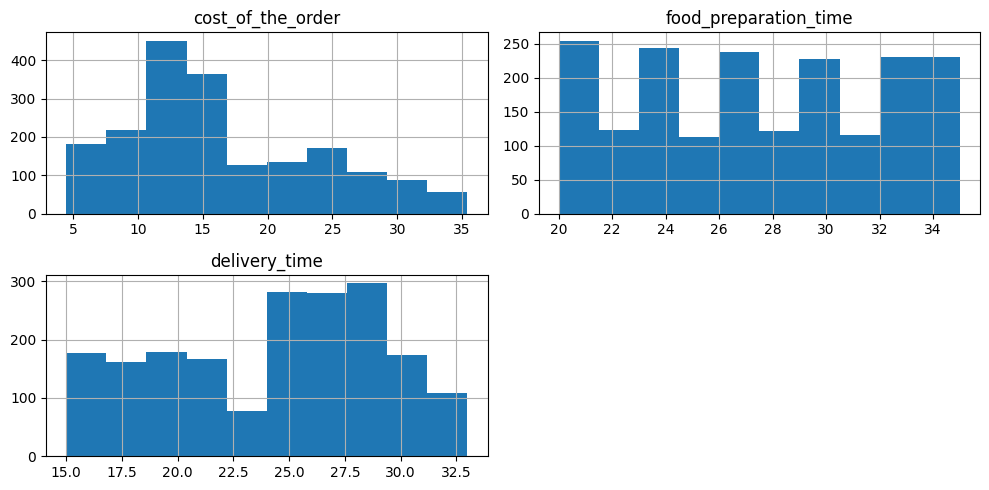

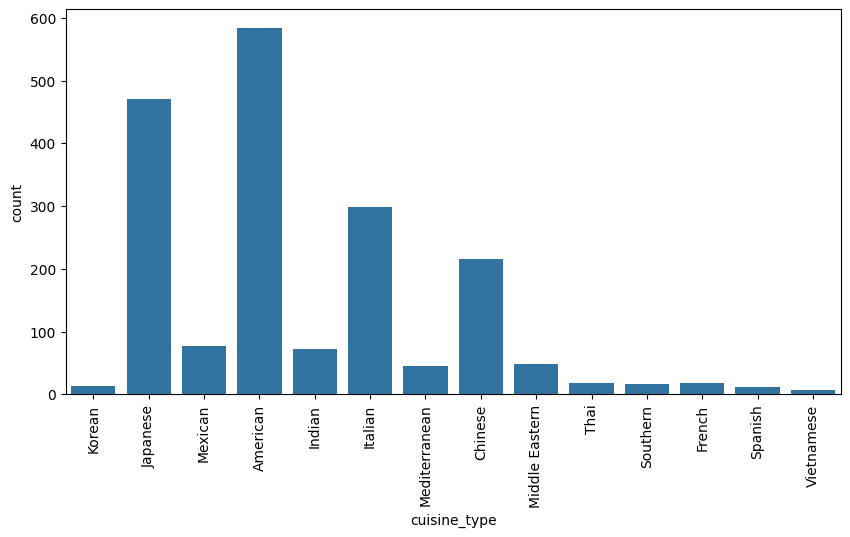

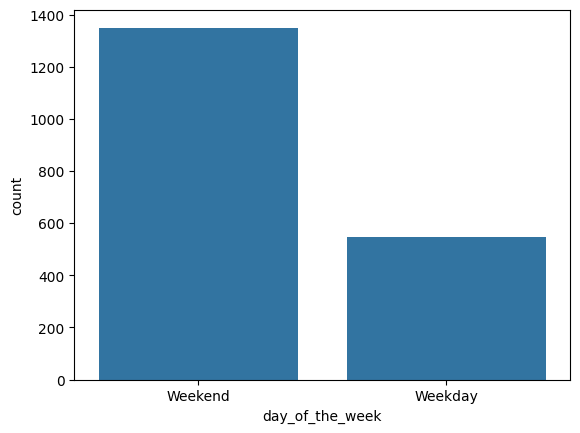

In [10]:
# **Numerical variables** - Histogram
num_cols = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
df[num_cols].hist(figsize=(10,5))  #Creates histograms
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))     #**Categorical variables** - Cuisine type
sns.countplot(data=df, x='cuisine_type')
plt.xticks(rotation=90)
plt.show()

sns.countplot(data=df, x='day_of_the_week')   # **Categorical variables** - Day of the week
plt.show()


#### Observations:
* Cost of the Order: Most orders cost between $5 and $30, but some are more expensive.

* Food Preparation Time: Food preparation time is usually 20–35 minutes, with a few taking longer.

* Delivery Time: Delivery time is mostly 15–30 minutes, but some orders take more time.

* Cuisine Type: Popular cuisines include American, Japanese, and Mexican.

* Day of the Week: Orders happen evenly across weekdays and weekends, but weekends may have more.

* Ratings: Many orders have missing ratings marked as "Not given".

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

---



In [11]:
# Count the number of orders per restaurant
top_restaurants = df["restaurant_name"].value_counts().head(5)

print("Top 5 Restaurants by Order Count:") # Print results
print(top_restaurants)

Top 5 Restaurants by Order Count:
restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations:

* Shake Shack is the most ordered restaurant.

* Blue Ribbon Fried Chicken and The Meatball Shop also receive many orders.

* Popular cuisines in these restaurants include American, Japanese, and Italian.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [12]:
# Filter only weekend orders
weekend_orders = df[df["day_of_the_week"] == "Weekend"]

# Count the number of orders per cuisine
popular_cuisine_weekend = weekend_orders["cuisine_type"].value_counts()

# Print the most popular cuisine
most_popular_cuisine = popular_cuisine_weekend.idxmax()
order_count = popular_cuisine_weekend.max()

print(f"The most popular cuisine on weekends is {most_popular_cuisine} with {order_count} orders.")

The most popular cuisine on weekends is American with 415 orders.


#### Observations:

* Tha most popular cuisine on weekends is American cuisine.

* American cuisine received the highest number of orders on weekends.

* Other cuisines, such as Japanese and Mexican, were also widely ordered.

* It means that customers prefer fast food, burgers, and comfort meals during weekends.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [13]:
total_orders = len(df)  # Count the total number of orders

high_cost_orders = (df["cost_of_the_order"] > 20).sum() # Count the number of orders where cost > 20

percentage = (high_cost_orders / total_orders) * 100   # Calculate percentage

print(f"Percentage of orders costing more than $20: {percentage:.2f}%")

Percentage of orders costing more than $20: 29.24%


#### Observations:

* Total orders-1,898

* Cost more than $20- 555 orders

* 29.24% of the orders cost more than $20

### **Question 10**: What is the mean order delivery time? [1 mark]

In [14]:
mean_delivery_time = df["delivery_time"].mean() # Calculate the average delivery time
print(f"Mean order delivery time: {mean_delivery_time:.2f} minutes")

Mean order delivery time: 24.16 minutes


#### Observations:
* The mean delivery time for food orders is 24.61 minutes

* Average, customers receive their food in about 25 minutes.

* Some orders are delivered much faster, while others take longer due to restaurant preparation or distance factors.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [15]:
# Count the number of orders per customer
top_customers = df["customer_id"].value_counts().head(3)

print("Top 3 most frequent customers and their order counts:")   # Print the result
print(top_customers)


Top 3 most frequent customers and their order counts:
customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


### Observations:
###The top 3 customers who placed the most orders are:

1.Customer ID: 52832 → 10 orders

2.Customer ID: 250494 → 9 orders

3.Customer ID: 47440 → 8 orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


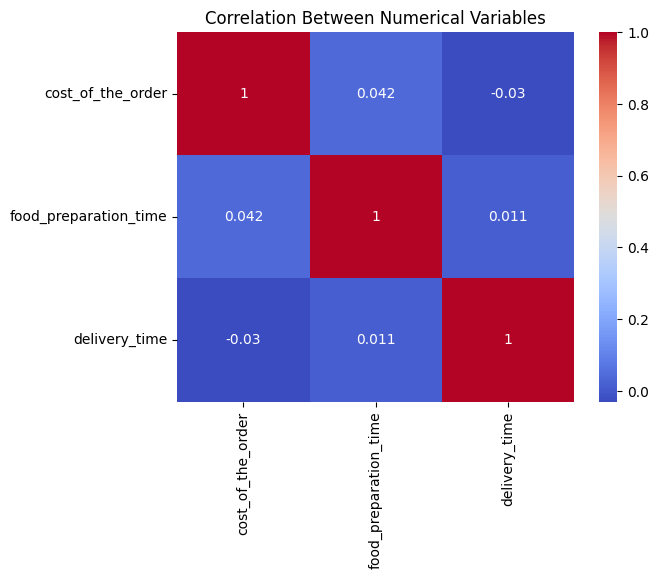

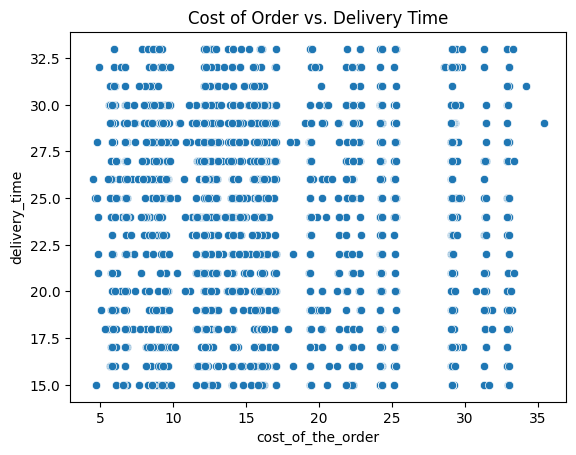

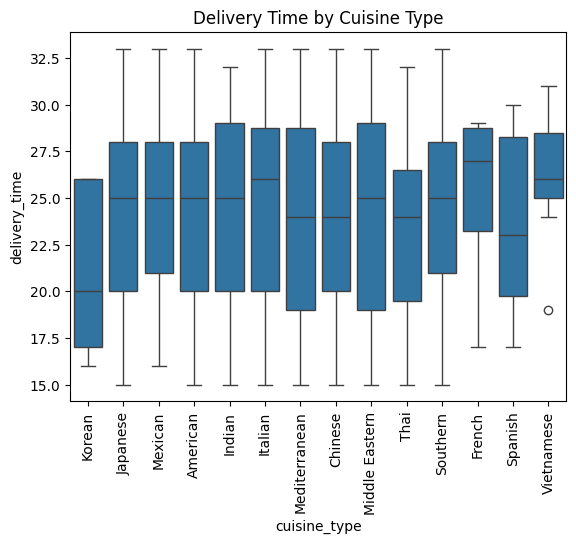

In [16]:
# **1. Correlation Heatmap (Numerical Variables)**
sns.heatmap(df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Numerical Variables")
plt.show()

# **2. Scatter Plot (Cost vs. Delivery Time)**
sns.scatterplot(x=df["cost_of_the_order"], y=df["delivery_time"])
plt.title("Cost of Order vs. Delivery Time")
plt.show()

# **3. Boxplot (Delivery Time by Cuisine Type)**
sns.boxplot(x=df["cuisine_type"], y=df["delivery_time"])
plt.xticks(rotation=90)
plt.title("Delivery Time by Cuisine Type")
plt.show()

### Observations:

####1.Numerical Correlation:-

* Weak link between food preparation time and delivery time (not always longer).

* Cost of the order does not strongly affect delivery or preparation time

####2.Scatter Plot (Cost vs. Delivery Time)

* Higher-cost orders don’t always take longer.

* Some expensive meals have slower delivery (possible bulk or complex orders).

####3.Boxplot (Cuisine Type vs. Delivery Time)

* Mexican & Italian meals often take longer to deliver.

* Fast food cuisines (e.g., American) are delivered quicker.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [17]:
# rating column containing string values, Convert rating column to numeric (if some values are stored as strings), or else it will give the error
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")  # Convert non-numeric values to NaN

# Group by restaurant and calculate rating count & average rating
restaurant_ratings = df.groupby("restaurant_name")["rating"].agg(["count", "mean"])

# Apply conditions: Rating count > 50 and average rating > 4
eligible_restaurants = restaurant_ratings[(restaurant_ratings["count"] > 50) & (restaurant_ratings["mean"] > 4)]

# Print eligible restaurants
print("Restaurants eligible for the promotional offer:")
print(eligible_restaurants)

Restaurants eligible for the promotional offer:
                           count      mean
restaurant_name                           
Blue Ribbon Fried Chicken     64  4.328125
Blue Ribbon Sushi             73  4.219178
Shake Shack                  133  4.278195
The Meatball Shop             84  4.511905


#### Observations:

* 4 restaurants are eligible for the promotional offer.

* Shake shake restaurant has a highest count with averate of 4.27ratings.

* Restaurants that qualify for the promotional offer can benefit from better visibility, customer trust, and increased sales.

* If a restaurant has a high rating count but a lower average rating, it might indicate inconsistency in service or food quality.

* These 4 restaurant are likely customer favorites, making them ideal for advertising.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [18]:
# Calculate revenue for orders > $20 (apply 25% charge)
high_cost_orders = df[df["cost_of_the_order"] > 20]
high_cost_revenue = (high_cost_orders["cost_of_the_order"] * 0.25).sum()

# Calculate revenue for orders > $5 (apply 15% charge)
mid_cost_orders = df[(df["cost_of_the_order"] > 5) & (df["cost_of_the_order"] <= 20)]
mid_cost_revenue = (mid_cost_orders["cost_of_the_order"] * 0.15).sum()

# Calculate total revenue
total_revenue = high_cost_revenue + mid_cost_revenue

print(f"Net revenue generated by the company: ${total_revenue:.2f}")

Net revenue generated by the company: $6166.30


#### Observations:

* The company earns a higher share (25%) from premium orders ($20+), contributing more revenue.

* Orders between $5 and $20 contribute a moderate amount at 15% charge.

* The total revenue is the sum of both charges from all orders is $6166.30

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [19]:
# Calculate total time (preparation time + delivery time)
df["total_time"] = df["food_preparation_time"] + df["delivery_time"]

total_orders = len(df)   # Count total orders

long_orders = (df["total_time"] > 60).sum()  # Count orders taking more than 60 minutes

percentage = (long_orders / total_orders) * 100  # Calculate percentage

print(f"Percentage of orders taking more than 60 minutes: {percentage:.2f}%")

Percentage of orders taking more than 60 minutes: 10.54%


#### Observations:

10.54% orders take more than 60 minutes to be prepared and delivered.

* This could be due to complex meals, peak-hour delays, or restaurant efficiency.

* Reducing long delivery times can improve customer satisfaction.

* If too many orders exceed 60 minutes, the company could optimize delivery efficiency to improve customer satisfaction.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [20]:
# Calculate mean delivery time for weekdays
weekday_mean = df[df["day_of_the_week"] == "Weekday"]["delivery_time"].mean()

# Calculate mean delivery time for weekends
weekend_mean = df[df["day_of_the_week"] == "Weekend"]["delivery_time"].mean()

print(f"Mean delivery time on weekdays: {weekday_mean:.2f} minutes")
print(f"Mean delivery time on weekends: {weekend_mean:.2f} minutes")

Mean delivery time on weekdays: 28.34 minutes
Mean delivery time on weekends: 22.47 minutes


#### Observations:

* weekday deliveries take longer time, office rush hours and possible traffic delays.

* weekend deliveries is faster maybe there is less traffic.

* The difference in mean delivery time suggests that the company could optimize weekdays logistics to improve customer satisfaction.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

## Conclusions:
###1.Order Cost Trends
* About 29% of the orders are above $20, which helps the company earn a higher 25% commission.
* Most orders cost between $5 and $30, and expensive orders bring in more revenue.

###2.Delivery Time Insights

* The average delivery time is around 24–25 minutes, which is generally reasonable.
* However, some orders take more than 60 minutes, likely due to restaurant efficiency or long preparation times
* Preparation Time is positively correlated with Delivery Time — meaning longer preparation causes delayed deliveries, which may affect customer satisfaction
* Weekday deliveries take longer than weekends, possibly due to higher traffic and operational challenges.

###3.Customer Preferences & Ratings

* American cuisine is the most popular, especially on weekends.
* Some restaurants qualify for promotions with more than 50 ratings and an average rating above 4.0.
* However, many orders have missing ratings, affecting customer feedback analysis.

####4.Popular Cuisine Preferences
* American cuisine is the most frequently ordered type.
* Japanese and Mexican cuisines are also popular, suggesting customers prefer quick-service foods and diverse meal options.
* Restaurants serving fast food tend to have quicker delivery times, while certain cuisines take longer due to preparation methods.



###5.Top Customers & Restaurants

* The top 3 most frequent customers placed multiple orders and can be rewarded with discount vouchers.
* Shake Shack and Blue Ribbon Fried Chicken are among the most ordered restaurants, suggesting strong customer preference.

###6.Final Conclusion
* Speeding up deliveries and encouraging more customer reviews can help improve satisfaction.
* Promoting higher-priced meals and popular cuisines like American and Japanese can boost revenue.
* Offering loyalty programs and discounts to repeat customers can build stronger relationships.


### Recommendations:

####1.Improve Delivery Speed
* Work on cutting delivery delays during weekdays by adding more staff or working with faster delivery partners.
* Find out which restaurants take too long to prepare food and help them speed up their kitchen processes.

####2.Get More Customer Feedback
* Ask customers to leave ratings and reviews after every order, so it's easier to track restaurant performance.
* Encourage customers to leave ratings and feedback, reducing the number of "Not given" reviews.
* Give special offers to restaurants that consistently get good reviews to keep customers happy.
* Offer compensation or give discounts for late deliveries to maintain a positive customer experience.

####3.Optimize Popular Cuisine Offerings
* American cuisine is the most ordered, especially on weekends. Offering combo deals or family-sized meals could attract more weekend customers.
* Japanese and Mexican cuisines are also favorites. Promotions on sushi, tacos, and ramen can boost sales.
* Fast food restaurants have quicker delivery times, making them great for express delivery options to improve speed and customer satisfaction.

####4.Boost Sales and Revenue
* Promote higher-priced meals (especially those over $20) because they bring in more profit through service charges.
* Advertise popular cuisines like American and Japanese, which attract more customers.
* Create special weekend deals for high-value orders to encourage spending.

####5.Keep Loyal Customers Happy
* Give repeat customers special discounts to make them feel valued and keep them coming back.
* Start a loyalty program to encourage frequent ordering and build a stronger customer base.

####6.Strengthen Restaurant Partnerships
* Provide performance reports to restaurants so they can improve food preparation and service.
* Recommend menu optimization based on high-selling dishes to increase efficiency